Lambda School Data Science

*Unit 1, Sprint 1, Module 4*

---

# ASSIGNMENT

### 1) Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

Get caught up to where we got our example in class and then try and take things further. How close to "pixel perfect" can you make the lecture graph?

Once you have something that you're proud of, share your graph in the cohort channel and move on to the second exercise.

### 2) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

**WARNING**: There are a lot of very custom graphs and tables at the above link. I **highly** recommend not trying to reproduce any that look like a table of values or something really different from the graph types that we are already familiar with. Search through the posts until you find a graph type that you are more or less familiar with: histogram, bar chart, stacked bar chart, line chart, [seaborn relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html), etc. Recreating some of the graphics that 538 uses would be a lot easier in Adobe photoshop/illustrator than with matplotlib. 

- If you put in some time to find a graph that looks "easy" to replicate you'll probably find that it's not as easy as you thought. 

- If you start with a graph that looks hard to replicate you'll probably run up against a brick wall and be disappointed with your afternoon.












In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

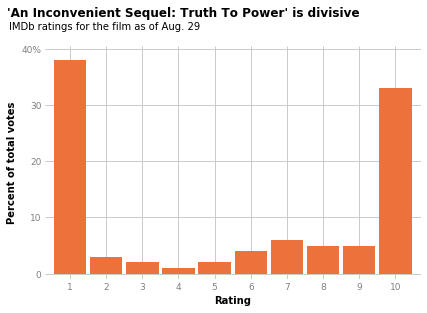

In [26]:
# Replicated graph with the example data used in the lecture

fake = pd.Series([38, 3, 2, 1, 2, 4, 6, 5, 5, 33], index=range(1,11))

# Set stylesheet
plt.style.use('fivethirtyeight')

# figure / axes syntax
fig, ax = plt.subplots()

# plot bars
fake.plot.bar(width=.9, color='#ED713A')

# background colors
fig.set(facecolor='white')
ax.set(facecolor='white')

# title
# color isn't needed for this style, loc is overridden by x and y
ax.set_title("'An Inconvenient Sequel: Truth To Power' is divisive", loc='left',
             color='black', fontsize=12, fontweight='bold', x=-.1, y=1.1)

# subtitle
ax.text(s='IMDb ratings for the film as of Aug. 29', 
        x=-1.7, y=43.5, fontsize=10)

# labels
ax.set_xlabel('Rating', fontsize=10, fontweight='bold')
ax.set_ylabel('Percent of total votes', fontsize=10, fontweight='bold')

# tick labels
ax.set_xticklabels(range(1,11,1), rotation=0, color='gray',fontsize=9)
ax.set_yticklabels([0,10,20,30,'40%'], color='gray', fontsize=9)

# y grid size
ax.set_yticks([0,10,20,30,40]);

# extend the grid a bit past the data, most noticeable on bottom
ax.set_ylim(bottom=-1, top=40.5)

# grid outline
ax.spines['left'].set_color(None)
ax.spines['right'].set_color(None)
ax.spines['top'].set_color(None)
ax.spines['bottom'].set_color(None)

# Save the file
# plt.savefig('jduke_example', bbox_inches='tight', facecolor='white')

# Now to reproduce another graph with actual data

I'm going with the graph from this article: https://projects.fivethirtyeight.com/trump-approval-ratings/

That page features an interactive graph, so here's a static screenshot of what we're going for.

<img src="https://github.com/jonDuke/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module4-make-explanatory-visualizations/538_capture.png?raw=true" width="600">

In [27]:
# First, to import the data
all_polls = pd.read_csv('https://projects.fivethirtyeight.com/trump-approval-data/approval_polllist.csv')
all_polls.head()

,president,subgroup,modeldate,startdate,enddate,pollster,grade,samplesize,population,weight,influence,approve,disapprove,adjusted_approve,adjusted_disapprove,multiversions,tracking,url,poll_id,question_id,createddate,timestamp
0,Donald Trump,All polls,1/16/2020,1/20/2017,1/22/2017,Gallup,B,1500.0,a,0.241682,0.0,45.0,45.0,45.836851,43.488476,NaN,T,http://www.gallup.com/poll/201617/gallup-daily...,49253,77265,1/23/2017,16:45:07 16 Jan 2020
1,Donald Trump,All polls,1/16/2020,1/20/2017,1/22/2017,Morning Consult,B/C,1992.0,rv,0.696984,0.0,46.0,37.0,44.490946,38.489691,NaN,NaN,http://static.politico.com/9b/13/82a3baf542ae9...,49249,77261,1/23/2017,16:45:07 16 Jan 2020
2,Donald Trump,All polls,1/16/2020,1/21/2017,1/23/2017,Gallup,B,1500.0,a,0.223234,0.0,45.0,46.0,45.836851,44.488476,NaN,T,http://www.gallup.com/poll/201617/gallup-daily...,49262,77274,1/24/2017,16:45:07 16 Jan 2020
3,Donald Trump,All polls,1/16/2020,1/20/2017,1/24/2017,Ipsos,B-,1632.0,a,0.150785,0.0,42.1,45.2,42.757778,44.103838,NaN,T,http://polling.reuters.com/#poll/CP3_2/,49426,77599,3/1/2017,16:45:07 16 Jan 2020
4,Donald Trump,All polls,1/16/2020,1/22/2017,1/24/2017,Rasmussen Reports/Pulse Opinion Research,C+,1500.0,lv,0.200335,0.0,57.0,43.0,51.076074,44.643531,NaN,T,http://www.rasmussenreports.com/public_content...,49266,77278,1/25/2017,16:45:07 16 Jan 2020


In [28]:
poll_estimate = pd.read_csv('https://projects.fivethirtyeight.com/trump-approval-data/approval_topline.csv')
poll_estimate.head()

,president,subgroup,modeldate,approve_estimate,approve_hi,approve_lo,disapprove_estimate,disapprove_hi,disapprove_lo,timestamp
0,Donald Trump,Voters,1/16/2020,43.603210,47.931353,39.275066,52.372832,56.211309,48.534355,16:47:13 16 Jan 2020
1,Donald Trump,Adults,1/16/2020,40.850083,44.188260,37.511907,53.846841,57.775522,49.918160,16:45:58 16 Jan 2020
2,Donald Trump,All polls,1/16/2020,42.420820,47.077850,37.763790,52.866008,56.703979,49.028037,16:45:07 16 Jan 2020
3,Donald Trump,Adults,1/15/2020,40.882533,44.222556,37.542510,53.823655,57.747756,49.899554,14:59:58 15 Jan 2020
4,Donald Trump,Voters,1/15/2020,43.199324,47.387286,39.011363,52.646051,56.292440,48.999662,15:01:24 15 Jan 2020


The first step is understanding how the data fits into the graph.

The first table has a list of all polls and their results, this matches the mostly transparent dots.  Each dot is a poll result, so this one is fairly straightforward.

The second table is an estimate of all polls for a given day, with 3 subgroups.  The interactive graph has a dropdown to switch between the subroups, but I will stick with the 'All polls' group seen in the example.  This estimate value is a weighted average, calculated by fivethirtyeight based on a poll's sample size, quality, and other factors.  The solid lines are approve_estimate and disapprove_estimate. The shaded area for each is between the hi and lo values, and includes 90% of the poll results for that day.

The vertical dotted line and big approve/disapprove numbers on the right are interactive, and will move and change based on where the mouse pointer is.  I will leave those out of my recreation for now.

In [0]:
# For this purpose I don't need all data, so let's slim it down

# It is unclear if the dots use the normal approve/disapprove columns, 
# or the adjusted ones, but I assume adjusted are the weighted values
all_polls = all_polls[['subgroup', 'approve', 'disapprove', 'adjusted_approve', 
                       'adjusted_disapprove', 'createddate']]

In [30]:
all_polls = all_polls[all_polls['subgroup'] == "All polls"]
all_polls.head()

,subgroup,approve,disapprove,adjusted_approve,adjusted_disapprove,createddate
0,All polls,45.0,45.0,45.836851,43.488476,1/23/2017
1,All polls,46.0,37.0,44.490946,38.489691,1/23/2017
2,All polls,45.0,46.0,45.836851,44.488476,1/24/2017
3,All polls,42.1,45.2,42.757778,44.103838,3/1/2017
4,All polls,57.0,43.0,51.076074,44.643531,1/25/2017


In [0]:
poll_estimate = poll_estimate.drop(columns=['president', 'timestamp'], axis=1)

In [32]:
poll_estimate = poll_estimate[poll_estimate['subgroup'] == 'All polls']
poll_estimate.head()

,subgroup,modeldate,approve_estimate,approve_hi,approve_lo,disapprove_estimate,disapprove_hi,disapprove_lo
2,All polls,1/16/2020,42.420820,47.077850,37.763790,52.866008,56.703979,49.028037
5,All polls,1/15/2020,42.150230,46.636292,37.664168,53.026897,56.727257,49.326536
8,All polls,1/14/2020,42.304678,46.843252,37.766104,52.792534,56.376478,49.208589
11,All polls,1/13/2020,42.296096,46.689285,37.902907,52.761621,56.336262,49.186980
14,All polls,1/12/2020,41.788103,46.786550,36.789656,53.453778,57.398717,49.508839


In [0]:
# Convert the datecoluns from string to datetime
all_polls['createddate'] = pd.to_datetime(all_polls['createddate'], 
                                          infer_datetime_format = True)
poll_estimate['modeldate'] = pd.to_datetime(poll_estimate['modeldate'], 
                                            infer_datetime_format = True)

In [0]:
# Matplotlib cannot graph datetime, adding new columns for the converted dates
import matplotlib.dates

# This converts to number of days since 0001-01-01 00:00:00 UTC, plus one
all_polls['date'] = matplotlib.dates.date2num(all_polls['createddate']) - 736352
poll_estimate['date'] = matplotlib.dates.date2num(poll_estimate['modeldate']) - 736352

In [35]:
# To get easier data to use, I'm subtracting the number of days since the start 
# date so that '0' is Jan 23rd 2017, which is where the data starts
from datetime import date
matplotlib.dates.date2num(date(2017, 1, 23))

736352.0

In [36]:
# So we end up with a column of "days since 2017/1/23"
all_polls[['createddate', 'date']].head()

,createddate,date
0,2017-01-23,0.0
1,2017-01-23,0.0
2,2017-01-24,1.0
3,2017-03-01,37.0
4,2017-01-25,2.0


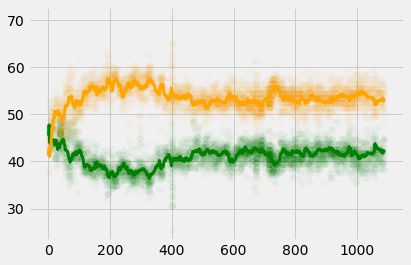

In [83]:
# Now, lets start with an initial graph
plt.style.use('fivethirtyeight')

plt.scatter(all_polls['date'], all_polls['adjusted_approve'],
            color='green', alpha=.03)
plt.scatter(all_polls['date'], all_polls['adjusted_disapprove'], 
            color='orange', alpha=.03)

plt.plot(poll_estimate['date'], poll_estimate['approve_estimate'], 
         color='green', linewidth=3)
plt.plot(poll_estimate['date'], poll_estimate['disapprove_estimate'], 
         color='orange', linewidth=3);

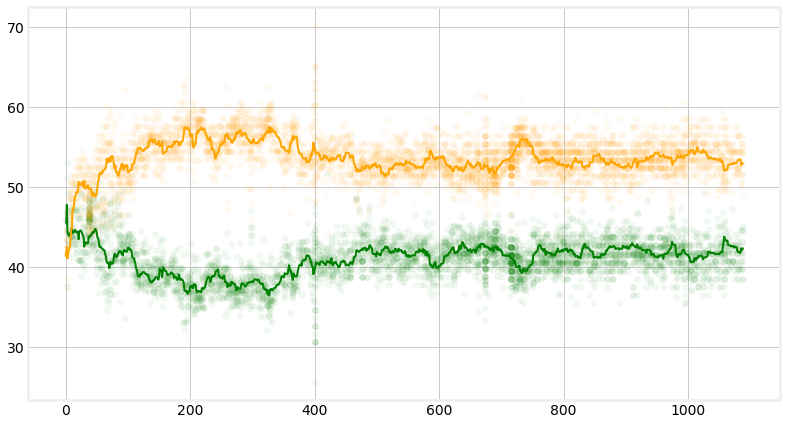

In [90]:
# Well, it's a start.  The shape is right, so we know the data matches
# Now let's clean it up.

# This cell was run many times as I added to it, it was not written all at once
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots()

# increase the plot size, this is a 16:9 ratio
fig.set_size_inches(12, 6.75)

# background colors
fig.set(facecolor='white')
ax.set(facecolor='white')

# plot the individual dots
plt.scatter(all_polls['date'], all_polls['adjusted_approve'], 
            color='green', alpha=.05)
plt.scatter(all_polls['date'], all_polls['adjusted_disapprove'], 
            color='orange', alpha=.05)

# plot the estimate line
plt.plot(poll_estimate['date'], poll_estimate['approve_estimate'], 
         color='green', linewidth=2)
plt.plot(poll_estimate['date'], poll_estimate['disapprove_estimate'], 
         color='orange', linewidth=2)

# plot the shaded area around the estimate line
ax.fill_between(poll_estimate['date'], y1=poll_estimate['approve_lo'], y2=poll_estimate['approve_hi'], color='green', alpha=.2)
ax.fill_between(poll_estimate['date'], y1=poll_estimate['disapprove_lo'], y2=poll_estimate['disapprove_hi'], color='orange', alpha=.2)

# set y ticks
ax.set_yticks(range(20,81,10))
ax.set_yticklabels([20,30,40,50,60,70,'80%'], color='gray', fontsize=10)
ax.get_yticklabels()[3].set_color('black') # change the individual tick

# set x ticks, ticks are the actual number of days
ax.set_xticks([0,70,160,250,340,430,520,610,700,790,880,970,1060])
ax.set_xticklabels(['JAN.23,2017','APRIL','JULY','OCT.','JAN.2018','APRIL',
                    'JULY','OCT.','JAN.2019','APRIL','JULY','OCT.','JAN.2020'], 
                   color='gray', fontsize=10)

# draw the horizontal black line along the middle (at 50%)
ax.axhline(y=50, xmin=-5, xmax=1090, color='black', linewidth=1)

# set the grid limits
ax.set_ylim(bottom=15, top=85)
ax.set_xlim(left=-10, right=1090) # max date in the data is actually 1088

# clear the grid outline
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False);

What I couldn't do:

Dot transparency is overlapping, so the more polls there were in one place the darker it gets.  I could not find a way to change that with just matplotlib.  Because of this, the current alpha is lower than the example, so that the dots don't hide the line graph where they bunch up.

The interactive portion is, of course, missing.  Maybe later when we learn the other libraries I'll remember to come back here.

In [60]:
type(ax.get_yticklabels()[3])

matplotlib.text.Text

# STRETCH OPTIONS

### 1) Reproduce one of the following using the matplotlib or seaborn libraries:

- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) 
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) 
- or another example of your choice!

### 2) Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!

In [0]:
# More Work Here